In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

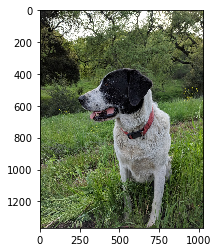

In [14]:
full = cv2.imread('C:/OpenCV/DATA/sammy.jpg') 
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB) 
plt.imshow(full)

(375, 486, 3)

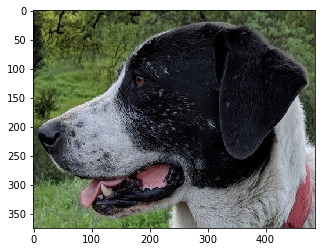

In [18]:
face = cv2.imread('C:/OpenCV/DATA/sammy_face.jpg') 
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)
face.shape

In [7]:
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

(-735580608.0, 1755388672.0, (0, 10), (231, 345))


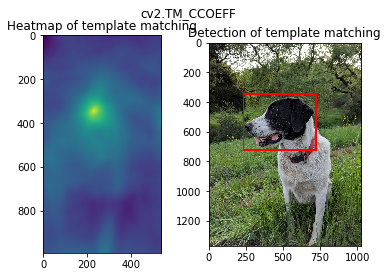





(-0.32965779304504395, 0.9982755780220032, (0, 14), (231, 345))


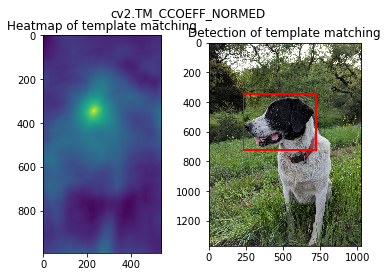





(2240523776.0, 5224793600.0, (66, 212), (335, 656))


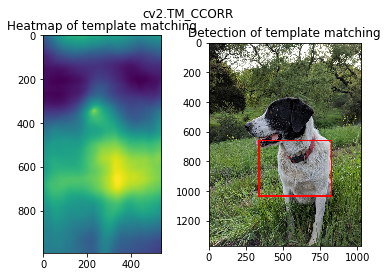





(0.4976869225502014, 0.9993349313735962, (0, 53), (231, 345))


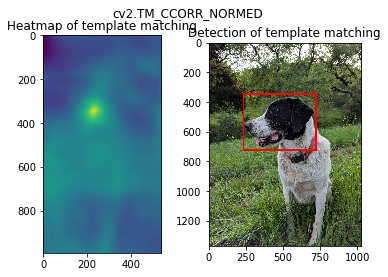





(6403460.0, 6297628672.0, (231, 345), (0, 0))


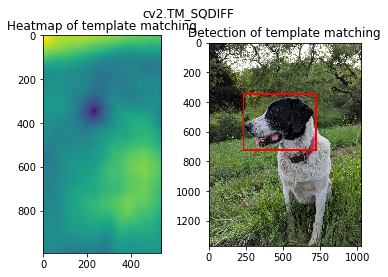





(0.001331940176896751, 1.0, (231, 345), (0, 0))


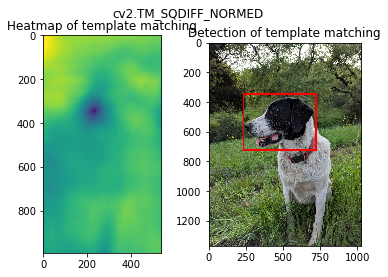

In [17]:
# loop through each method of template matching from the list above
for m in methods:
    # create copy
    fullycopy = full.copy()
    # look at notebook to understand "eval" syntax. Basically turns a string into a function.
    method = eval(m)




    #template match    (Main_picture, find_this_img, method)     ***MAIN FOCUS. UNDERSTAND THE PARAMATERS NEEDED***
    res = cv2.matchTemplate(fullycopy, face, method)



    # added the print statement myself
    minval,maxval, minloc, maxloc  = cv2.minMaxLoc(res)
    print( cv2.minMaxLoc(res))




    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        topleft = minloc #(x,y)
    else:
        topleft = maxloc

    #(y, x) since cv2 is weird
    height, width, channel = face.shape

    botright = (topleft[0] + width, topleft[1] + height)

    cv2.rectangle(fullycopy, topleft, botright, (255,0,0), thickness = 10)

    # create plot 1 row by 2 columbs; grab the 1st 
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of template matching")

    # create plot 1 row by 2 columbs; grab the 2nd 
    plt.subplot(122)
    plt.imshow(fullycopy)
    plt.title("Detection of template matching")
    plt.suptitle(m)

    plt.show()

    print("\n")
    print("\n")

In [11]:
# notice how sqrdiff works the opposite. that is why we have the if statement.